In [18]:
import numpy as np                                     # 넘파이 패키지
import pandas as pd                                    # 판다스 패키지
import matplotlib.pyplot as plt                        # 그래프 패키지
from sklearn.model_selection import train_test_split   # 데이터 셋 분할

from sklearn.linear_model import LinearRegression      # 선형 회귀 패키지
from sklearn.linear_model import Ridge                 # 릿지 선형 회귀 패키지
from sklearn.preprocessing import PolynomialFeatures   # 특성 변환기 패키지

from keras.models import Sequential
from keras import optimizers
import tensorflow as tf

from keras.callbacks import EarlyStopping
from keras.models import load_model

from sklearn.metrics import mean_absolute_error        # 평균 절대값 에러(모델 평가 지수)
from sklearn.metrics import mean_squared_error         # 평균 제곱근 에러(모델 평가 지수)

from keras.layers import Conv1D, GlobalMaxPooling1D, Dense, Input, Flatten, Concatenate, LSTM, Bidirectional

In [19]:
# 코랩과 구굴 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')   # content는 내 드라이브 디렉토리입니다.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RNN/final/mokpo_data.csv')
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30624 entries, 0 to 30623
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기온      30624 non-null  float64
 1   풍속      30624 non-null  float64
 2   습도      30624 non-null  int64  
 3   기압      30624 non-null  float64
 4   일조      30624 non-null  float64
 5   일사      30624 non-null  float64
 6   전운량     30624 non-null  int64  
 7   발전량     30624 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 1.9 MB
None
    기온   풍속  습도      기압   일조  일사   전운량  발전량
0 -3.6  1.9  66  1027.7  0.0  0.0    9  0.0
1 -4.4  2.3  66  1027.6  0.0  0.0    6  0.0
2 -4.1  2.1  65  1028.1  0.0  0.0    9  0.0
3 -4.0  1.1  63  1028.0  0.0  0.0    9  0.0
4 -4.2  1.3  63  1027.5  0.0  0.0    9  0.0


In [21]:
data = np.array(data)          # 데이터 프레임을 배열로 변환
data = (data - np.min(data, 0)) / (np.max(data, 0) - np.min(data, 0)) # 정규화
print(data.shape)              # 데이터 스케일 보기
print(len(data) * 0.8)         # 데이터 나누기 위해서

(30624, 8)
24499.2


In [22]:
x_data = data[ : -1, : ]             # 입력 데이터(마지막 샘플 전까지)
y_data = data[1 : , -1]              # 타겟 데이터(다음날 부터 마지막 샘플까지)
print(x_data.shape)
print(y_data.shape)
print(y_data[:5])

(30623, 8)
(30623,)
[0. 0. 0. 0. 0.]


In [23]:
x_train = x_data[ : 24499 ,  : ]         # 학습 데이터
y_train = y_data[ : 24499]

x_test = x_data[24499 : ,  : ]          # 테스트 데이터
y_test = y_data[24499 :]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(24499, 8)
(24499,)
(6124, 8)
(6124,)


인공신경망 다중회귀

In [24]:
# 입력층 - 출력층
model = Sequential()
model.add(Dense(1, input_dim = 8 , activation='linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.compile(loss = 'mse', optimizer = optimizers.Adam(0.001), metrics=['accuracy'])
monitor_val_lose = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3)

In [26]:
hist = model.fit(
                  x_train, y_train,
                  epochs = 10, batch_size = 10,
                  validation_data=(x_test, y_test),
                  callbacks = [monitor_val_lose]
)

Epoch 1/10
2450/2450 [==============================] - 6s 2ms/step - loss: 0.0578 - accuracy: 0.4650 - val_loss: 0.0101 - val_accuracy: 0.5536
Epoch 2/10
2450/2450 [==============================] - 6s 2ms/step - loss: 0.0073 - accuracy: 0.4849 - val_loss: 0.0082 - val_accuracy: 0.5536
Epoch 3/10
2450/2450 [==============================] - 5s 2ms/step - loss: 0.0064 - accuracy: 0.4849 - val_loss: 0.0082 - val_accuracy: 0.5536
Epoch 4/10
2450/2450 [==============================] - 8s 3ms/step - loss: 0.0063 - accuracy: 0.4849 - val_loss: 0.0082 - val_accuracy: 0.5536
Epoch 5/10
2450/2450 [==============================] - 7s 3ms/step - loss: 0.0063 - accuracy: 0.4849 - val_loss: 0.0083 - val_accuracy: 0.5536
Epoch 6/10
2450/2450 [==============================] - 5s 2ms/step - loss: 0.0063 - accuracy: 0.4849 - val_loss: 0.0082 - val_accuracy: 0.5536
Epoch 7/10
2450/2450 [==============================] - 8s 3ms/step - loss: 0.0063 - accuracy: 0.4849 - val_loss: 0.0081 - val_accuracy:

In [27]:
predict = model.predict(x_test)

mae = mean_absolute_error(y_test, predict)
mse = mean_squared_error(y_test, predict)
rmse = mse**0.5
print(mae)
print(mse)
print(rmse)

192/192 [==============================] - 0s 1ms/step
0.05580013347814073
0.008159999427137854
0.09033271515424439


## DNN 모델

In [28]:
# 입력층 - 중간층 - 출력층
model = Sequential()
model.add(Dense(32, input_dim = 8, activation='relu'))
##model.add(Dense(32, activation='relu'))
#model.add(Dense(32, activation='relu'))
#model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                288       
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.compile(loss = 'mse', optimizer = optimizers.Adam(0.001), metrics=['accuracy'])
monitor_val_lose = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3)

In [30]:
hist = model.fit(
                  x_train, y_train,
                  epochs = 10, batch_size = 10,
                  validation_data=(x_test, y_test),
                  callbacks = [monitor_val_lose]
)

Epoch 1/10
2450/2450 [==============================] - 7s 2ms/step - loss: 0.0088 - accuracy: 0.4847 - val_loss: 0.0077 - val_accuracy: 0.5536
Epoch 2/10
2450/2450 [==============================] - 7s 3ms/step - loss: 0.0060 - accuracy: 0.4849 - val_loss: 0.0074 - val_accuracy: 0.5536
Epoch 3/10
2450/2450 [==============================] - 5s 2ms/step - loss: 0.0058 - accuracy: 0.4849 - val_loss: 0.0074 - val_accuracy: 0.5536
Epoch 4/10
2450/2450 [==============================] - 5s 2ms/step - loss: 0.0055 - accuracy: 0.4849 - val_loss: 0.0074 - val_accuracy: 0.5536
Epoch 5/10
2450/2450 [==============================] - 7s 3ms/step - loss: 0.0054 - accuracy: 0.4849 - val_loss: 0.0067 - val_accuracy: 0.5536
Epoch 6/10
2450/2450 [==============================] - 5s 2ms/step - loss: 0.0053 - accuracy: 0.4849 - val_loss: 0.0064 - val_accuracy: 0.5536
Epoch 7/10
2450/2450 [==============================] - 6s 2ms/step - loss: 0.0052 - accuracy: 0.4849 - val_loss: 0.0066 - val_accuracy:

In [31]:
predict = model.predict(x_test)

mae = mean_absolute_error(y_test, predict)
mse = mean_squared_error(y_test, predict)
rmse = mse**0.5
print(mae)
print(mse)
print(rmse)

192/192 [==============================] - 0s 2ms/step
0.04494573682294883
0.006180961431843852
0.07861909075945774


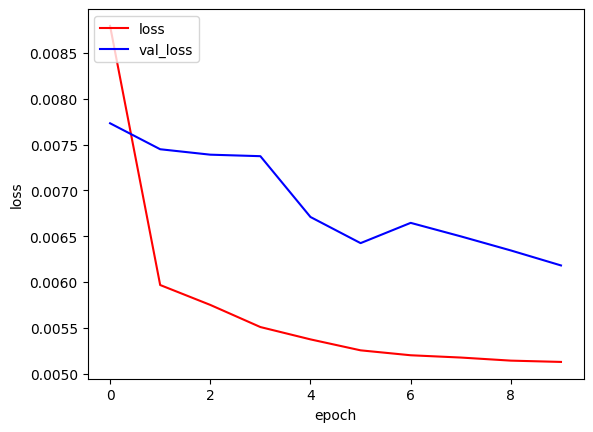

In [32]:
# 그래프 출력
import matplotlib.pyplot as plt
# 과정 살펴보기
plt.plot(hist.history['loss'], 'r', label = 'loss')
plt.plot(hist.history['val_loss'], 'b', label = 'val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

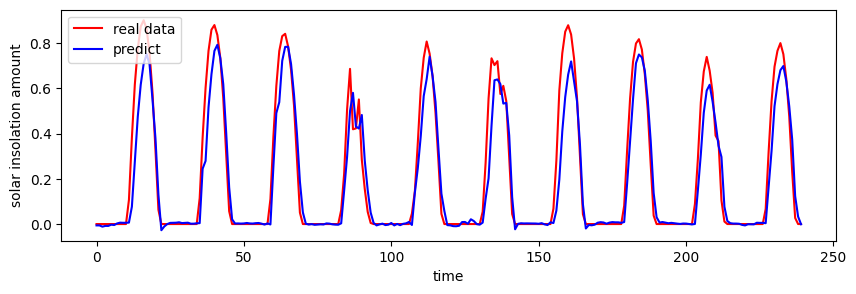

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 3))
plt.plot(y_test[0 : 240], 'r', label = 'real data')   # 실제값 출력
plt.plot(predict[00 : 240], 'b', label = 'predict')    # 예측값 출력
plt.xlabel("time")
plt.ylabel("solar insolation amount")
plt.legend(loc='upper left')
plt.show()

## LSTM 모델로 예측하기

In [34]:
x_data = []                         # 입력데이터 리스트
y_data = []                         # 타겟데이터 리스트

for i in range(1, len(data) - 24) :
  x = data[i : i + 24, : ]
  y = data[i + 24, [-1]]
  x_data.append(x)
  y_data.append(y)

x_data = np.array(x_data)
y_data = np.array(y_data)

print(x_data.shape)
print(y_data.shape)

(30599, 24, 8)
(30599, 1)


In [35]:
# 데이터 셋 만들기
x_train = x_data[ : 24499 ,  : ]         # 학습 데이터
y_train = y_data[ : 24499]

x_test = x_data[24499 : ,  : ]          # 테스트 데이터
y_test = y_data[24499 :]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(24499, 24, 8)
(24499, 1)
(6100, 24, 8)
(6100, 1)


In [36]:
model = Sequential()
model.add(LSTM(128, input_shape=(24, 8)))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               70144     
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 86785 (339.00 KB)
Trainable params: 86785 (339.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model.compile(loss = 'mse', optimizer = optimizers.Adam(0.001), metrics=['accuracy'])
monitor_val_lose = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3)

In [38]:
hist = model.fit(
                  x_train, y_train,
                  epochs = 50, batch_size = 10,
                  validation_data=(x_test, y_test),
                  callbacks = [monitor_val_lose]
)

Epoch 1/50
2450/2450 [==============================] - 56s 22ms/step - loss: 0.0041 - accuracy: 0.4847 - val_loss: 0.0031 - val_accuracy: 0.5536
Epoch 2/50
2450/2450 [==============================] - 56s 23ms/step - loss: 0.0025 - accuracy: 0.4847 - val_loss: 0.0027 - val_accuracy: 0.5536
Epoch 3/50
2450/2450 [==============================] - 54s 22ms/step - loss: 0.0023 - accuracy: 0.4847 - val_loss: 0.0027 - val_accuracy: 0.5536
Epoch 4/50
2450/2450 [==============================] - 54s 22ms/step - loss: 0.0022 - accuracy: 0.4847 - val_loss: 0.0030 - val_accuracy: 0.5536
Epoch 5/50
2450/2450 [==============================] - 58s 24ms/step - loss: 0.0022 - accuracy: 0.4847 - val_loss: 0.0033 - val_accuracy: 0.5536
Epoch 6/50
2450/2450 [==============================] - 55s 23ms/step - loss: 0.0021 - accuracy: 0.4847 - val_loss: 0.0029 - val_accuracy: 0.5536


In [39]:
predict = model.predict(x_test)

mae = mean_absolute_error(y_test, predict)
mse = mean_squared_error(y_test, predict)
rmse = mse**0.5
print(mae)
print(mse)
print(rmse)

191/191 [==============================] - 4s 19ms/step
0.02706885579998978
0.002927158002309541
0.054103216191919136


## BiLSTM 모델로 예측하기

In [40]:
model = Sequential()
model.add(Bidirectional(LSTM(128), input_shape=(24, 8)))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 256)               140288    
 al)                                                             
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 173313 (677.00 KB)
Trainable params: 173313 (677.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
model.compile(loss = 'mse', optimizer = optimizers.Adam(0.001), metrics=['accuracy'])
monitor_val_lose = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3)

In [42]:
hist = model.fit(
                  x_train, y_train,
                  epochs = 10, batch_size = 10,
                  validation_data=(x_test, y_test),
                  callbacks = [monitor_val_lose]
)

Epoch 1/10
2450/2450 [==============================] - 104s 41ms/step - loss: 0.0037 - accuracy: 0.4847 - val_loss: 0.0030 - val_accuracy: 0.5536
Epoch 2/10
2450/2450 [==============================] - 94s 38ms/step - loss: 0.0024 - accuracy: 0.4847 - val_loss: 0.0029 - val_accuracy: 0.5536
Epoch 3/10
2450/2450 [==============================] - 90s 37ms/step - loss: 0.0022 - accuracy: 0.4847 - val_loss: 0.0027 - val_accuracy: 0.5536
Epoch 4/10
2450/2450 [==============================] - 91s 37ms/step - loss: 0.0022 - accuracy: 0.4847 - val_loss: 0.0039 - val_accuracy: 0.5536
Epoch 5/10
2450/2450 [==============================] - 94s 38ms/step - loss: 0.0021 - accuracy: 0.4847 - val_loss: 0.0027 - val_accuracy: 0.5536
Epoch 6/10
2450/2450 [==============================] - 93s 38ms/step - loss: 0.0020 - accuracy: 0.4847 - val_loss: 0.0027 - val_accuracy: 0.5536
Epoch 7/10
2450/2450 [==============================] - 90s 37ms/step - loss: 0.0020 - accuracy: 0.4847 - val_loss: 0.0024 

In [43]:
predict = model.predict(x_test)

mae = mean_absolute_error(y_test, predict)
mse = mean_squared_error(y_test, predict)
rmse = mse**0.5
print(mae)
print(mse)
print(rmse)

191/191 [==============================] - 4s 16ms/step
0.022694144282510084
0.0022848968102217133
0.0478005942454873


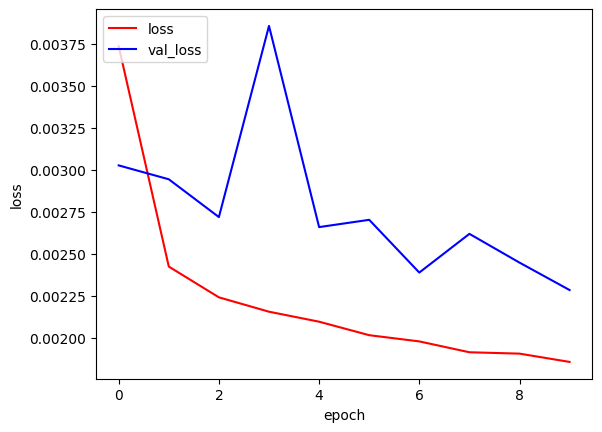

In [44]:
# 그래프 출력
import matplotlib.pyplot as plt
# 과정 살펴보기
plt.plot(hist.history['loss'], 'r', label = 'loss')
plt.plot(hist.history['val_loss'], 'b', label = 'val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

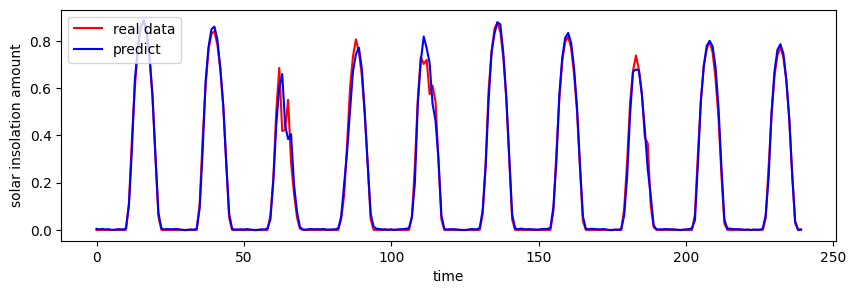

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 3))
plt.plot(y_test[0 : 240], 'r', label = 'real data')   # 실제값 출력
plt.plot(predict[00 : 240], 'b', label = 'predict')    # 예측값 출력
plt.xlabel("time")
plt.ylabel("solar insolation amount")
plt.legend(loc='upper left')
plt.show()